In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
import pandas as pd
import json

Загрузим модели

In [0]:
idd = '1Bz3u00AOuc3AmuyT8684P0gzslmqLLTY'
downloaded_ = drive.CreateFile({'id':idd}) 
downloaded_.GetContentFile('lstm.json')  
json_data=open('lstm.json').read()
lstm = json.loads(json_data)
lstm.sort(key = lambda x: (x['prev'], x['orig'][0]))

In [0]:
idd = '1FYHnCpyDgBgS16djg9dBXXZyb9ZpYJgF'
downloaded_ = drive.CreateFile({'id':idd}) 
downloaded_.GetContentFile('HMM.json')  
json_data=open('HMM.json').read()
HHM_wiki = json.loads(json_data)
HHM_wiki.sort(key = lambda x: x['prev'])

In [0]:
idd = '1axnQJvPKytOlN9Tg0RrP5J00KL9E3EVU'
downloaded_ = drive.CreateFile({'id':idd}) 
downloaded_.GetContentFile('HMM.json')  
json_data=open('HMM.json').read()
HHM_3gr_paper = json.loads(json_data)
HHM_3gr_paper.sort(key = lambda x: x['prev'])

In [0]:
idd = '1f7bgVE44wLC8GdT26AlaZQtNvkMWiF1C'
downloaded_ = drive.CreateFile({'id':idd}) 
downloaded_.GetContentFile('HMM.json')  
json_data=open('HMM.json').read()
HHM_3gr_lit = json.loads(json_data)
HHM_3gr_lit.sort(key = lambda x: x['prev'])

In [0]:
idd = '1FHUwghS-BtDp8jLKlBcvOU7FAolw8Fwi'
downloaded_ = drive.CreateFile({'id':idd}) 
downloaded_.GetContentFile('HMM.json')  
json_data=open('HMM.json').read()
HHM_2gr_paper = json.loads(json_data)
HHM_2gr_paper.sort(key = lambda x: x['prev'])

In [0]:
idd = '1muIAcd3gnJxhsG1g-v0PtoqbqFTQK6TG'
downloaded_ = drive.CreateFile({'id':idd}) 
downloaded_.GetContentFile('HMM.json')  
json_data=open('HMM.json').read()
HHM_2gr_lit = json.loads(json_data) 
HHM_2gr_paper.sort(key = lambda x: x['prev'])

In [0]:
idd = '1K13SvXsW3tS3P_oIN94cUC76P0ELFFcc'
downloaded_ = drive.CreateFile({'id':idd}) 
downloaded_.GetContentFile('HMM.json')  
json_data=open('HMM.json').read()
bert = json.loads(json_data) 
bert.sort(key = lambda x: x['prev'])


In [1]:
!wget https://github.com/semensorokin/NLP_projects/raw/master/LSTM_Cloze_prob_task/Cloze_task_data/cloze_task_raw_data.xlsx

--2019-04-11 11:50:50--  https://github.com/semensorokin/NLP_projects/raw/master/LSTM_Cloze_prob_task/Cloze_task_data/cloze_task_raw_data.xlsx
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/semensorokin/NLP_projects/master/LSTM_Cloze_prob_task/Cloze_task_data/cloze_task_raw_data.xlsx [following]
--2019-04-11 11:50:50--  https://raw.githubusercontent.com/semensorokin/NLP_projects/master/LSTM_Cloze_prob_task/Cloze_task_data/cloze_task_raw_data.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3797486 (3.6M) [application/octet-stream]
Saving to: ‘cloze_task_raw_data.xlsx’

cloze_

Из сырых данных cloze task уберем мусор:


*  'Введите первое слово'
*  Рандомные наборы букв



In [2]:
import pandas as pd
row_data = pd.read_excel('cloze_task_raw_data.xlsx')
print(row_data.shape)
row_data = row_data[row_data['shown'] != 'Введите первое слово']
print(row_data.shape)

def clear(x):
    flag=0
    if x.isdigit():
        return 0
    if (len(x)==1) and (x not in 'ксявуоиа'):
        flag+=1
    for i in x:
        if i not in 'ячсмитьбюэждлорпавыфйцукенгшщзхъЯЧСМИТЬБЮФЫВАПРОЛДЖЭЪХЗЩЙЦШУГКНЕ':
             flag+=1
    if flag==0:
        return x
    else:
        return 0
row_data.answer = row_data.answer.astype(str)
row_data.answer = row_data.answer.apply(clear)
row_data = row_data[row_data['answer']!=0]

sub_data = row_data[['shown', 'answer', 'word.id']]
grop_data = sub_data[['shown', 'answer', 'word.id']].groupby(['shown', 'word.id']).size()
grop_data = grop_data.reset_index(level=['shown', 'word.id'])
print(grop_data.head())

comp = row_data[['shown', 'answer', 'word.id']].merge(grop_data, left_on=['shown', 'word.id'], right_on=['shown', 'word.id'], how='outer')

sub_data = row_data[['shown', 'answer', 'word.id']]
grop_data = sub_data[['shown', 'answer', 'word.id']].groupby(['shown', 'word.id', 'answer']).size()
grop_data = grop_data.reset_index(level=['shown', 'word.id', 'answer'])
comp_ = comp.merge(grop_data, left_on=['shown', 'word.id', 'answer'], right_on=['shown', 'word.id', 'answer'], how='outer')

comp_['prob'] = comp_['0_y']/comp_['0_x']

comp_ = comp_.drop_duplicates()
comp_[comp_['0_y']>1].head()
comp_ = comp_.sort_values('shown')

(64645, 16)
(57836, 16)
                            shown    word.id   0
0                               А  промывать  15
1                     А промывать     манную  15
2              А промывать манную      крупу  15
3        А промывать манную крупу      перед  15
4  А промывать манную крупу перед        тем  15


In [0]:
import re
cloze_task = []
gr = comp_[['shown', 'word.id', 'answer', 'prob']].groupby(['shown', 'word.id'])
for key, value in gr:
  new_values = {}
  s = key[0].lower()
  s = s.replace('ё','е')
  s = ' '.join(re.findall('[а-я]+', s))
  new_values['prev'] = s
  new_values['orig'] = [key[1], 'X']
  new_values['pred'] = [list(i[2:]) for i in value.values]
  cloze_task.append(new_values)

cloze_task.sort(key = lambda x: (x['prev'], x['orig'][0]))

In [0]:
import json
with open('cloze_task.json','w',encoding='utf8') as fd:
    JSON_CLOZE = json.dump(cloze_task,fd)
    
from google.colab import files
files.download('cloze_task.json')

In [0]:
len(lstm), len(cloze_task), len(HHM_2gr_lit)

(1219, 1222, 1219)

In [0]:
f = [(i['prev'],i['orig'][0]) for i in lstm]

In [0]:
ct = [i for i in cloze_task if (i['prev'],i['orig'][0]) in f] 
len(ct)

1182

Далее:
* Берем контекст
* Получаем вероятностное распределение от его возможных ответов
* Случайным образом шифруем слова цифрами
* Проводим 1000 случайных экспериментов, при этом генерируем шифрование слова с заданными вероятностями


Применим этот алгоритм для cloze task


Теперь применим этот алгоритм для LSTM

In [0]:
import numpy as np
def th_exp_json(lstm):  
  res_lstm = [(i['prev'], i['orig'][0]) for i in lstm]
  r_lstm = {}
  for index, context in enumerate(lstm):
    summ = sum([i[1] for i in context['pred'][:50]])
    r_lstm[res_lstm[index]] = [i[1]/summ for i in context['pred'][:50]]

  lstm_table = []
  for context, probs in list(r_lstm.items()):
    pair = [context[0], context[1]]
    if len(probs)<50:
      probs.extend([0]*(50-len(probs)))
    probs.sort(reverse=True)
    pair.extend(np.random.choice(50, 1000, p=probs))
    lstm_table.append(pair)

  res_lstm = pd.DataFrame(np.array(lstm_table), columns = ['shown', 'word']+[str(i)+'_experiment' for i in range(1000)])
  res_lstm = res_lstm.sort_values('shown')
  return res_lstm
  
res_lstm = th_exp_json(lstm)
res_lstm.head()

,shown,word,0_experiment,1_experiment,2_experiment,3_experiment,4_experiment,5_experiment,6_experiment,7_experiment,...,990_experiment,991_experiment,992_experiment,993_experiment,994_experiment,995_experiment,996_experiment,997_experiment,998_experiment,999_experiment
0,а,промывать,43,10,36,36,14,0,8,0,...,14,10,0,16,21,37,20,1,4,0
1,а промывать,манную,12,14,12,0,4,4,0,0,...,2,1,3,4,0,25,15,1,2,4
2,а промывать манную,крупу,0,0,0,0,0,0,14,0,...,0,0,0,0,0,0,0,1,0,6
3,а промывать манную крупу,перед,6,4,2,10,5,0,3,1,...,2,10,0,0,0,5,20,6,0,20
4,а промывать манную крупу перед,тем,2,19,14,1,0,5,1,2,...,0,9,6,0,0,48,19,0,2,12


In [0]:
res_HMM_wiki = th_exp_json(HHM_wiki)
res_HMM_3gr_paper = th_exp_json(HHM_3gr_paper)
res_HMM_2gr_paper = th_exp_json(HHM_2gr_paper)
res_HMM_3gr_lit = th_exp_json(HHM_3gr_lit)
res_HMM_2gr_lit = th_exp_json(HHM_2gr_lit)
res_bert = th_exp_json(bert)

In [0]:
res_сloze_task = th_exp_json(cloze_task)
res_сloze_task.head()

,shown,word,0_experiment,1_experiment,2_experiment,3_experiment,4_experiment,5_experiment,6_experiment,7_experiment,...,990_experiment,991_experiment,992_experiment,993_experiment,994_experiment,995_experiment,996_experiment,997_experiment,998_experiment,999_experiment
0,а,промывать,6,10,2,13,5,1,11,8,...,7,14,7,12,0,14,9,6,1,14
1,а промывать,манную,0,3,3,0,9,6,1,0,...,0,1,1,5,5,0,3,0,3,3
2,а промывать манную,крупу,1,0,0,1,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
3,а промывать манную крупу,перед,0,0,0,5,0,3,4,0,...,0,1,6,6,4,0,0,0,4,0
4,а промывать манную крупу перед,тем,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


**Зачем нужно проводить множество случайных экспериментов?**

Имитация результатов Cloze task и LSTM (как все могло бы быть в 1000 разных экспериментах).

___

###Визуализация

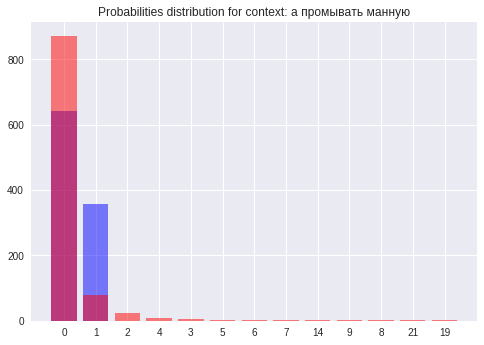

Ks_2sampResult(statistic=0.22899999999999998, pvalue=1.866449076853286e-23)

In [0]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
from collections import Counter

context = 'а промывать манную'
ct_example = res_сloze_task[res_сloze_task['shown'] == context].values[0][2:]
lstm_example = res_lstm[res_lstm['shown'] == context].values[0][2:]

def plotHist(massiv):
  gg =  list(Counter(massiv).items())
  gg.sort(key = lambda x: x[1], reverse=True)
  return [x for x, y in gg ], [y for x, y in gg]

x,y = plotHist(ct_example)
x1,y1 = plotHist(lstm_example)
plt.bar(x,y, alpha = 0.5, lw=3, color= 'b')
plt.bar(x1,y1, alpha = 0.5, lw=3, color= 'r')
plt.title('Probabilities distribution for context: '+context)
plt.show()
ks_2samp(ct_example,lstm_example)


In [0]:
def k_s_tests(res_lstm, res_ct):
  fer = res_lstm[['shown','word']].groupby(['shown', 'word'])
  keys = list(fer.groups.keys())
  KS_test = []
  s = 0
  for sent, word in keys:
    a = res_lstm[(res_lstm['shown']==sent) & (res_lstm['word']==word)].iloc[:, 2:].values[0]
    b =  res_ct[(res_ct['shown']==sent) & (res_ct['word']==word)].iloc[:, 2:].values
    if len(b)>0:
      ks_one = ks_2samp(a, b[0])
      #if ks_one[1]>0.05:
        #print(ks_one[1])
      KS_test.append(ks_one)
      s+=1
  print('In', len([j for i, j in KS_test if j > 0.05])/(len(KS_test))*100, '% of cases we can say that these distributions are simular')
  #return len([j for i, j in KS_test if j > 0.05])/(len(KS_test))*100
  return sum([i for i, j in KS_test])

In [0]:
models = [res_HMM_wiki, res_HMM_3gr_paper, res_HMM_2gr_paper, res_HMM_3gr_lit, res_HMM_2gr_lit, res_сloze_task, res_lstm, res_bert]
for_hm = []
for model in models:
  line = []
  for mod in models:
    line.append(k_s_tests(model, mod))
  for_hm.append(line)

In 100.0 % of cases we can say that these distributions are simular
In 3.0352748154224773 % of cases we can say that these distributions are simular
In 5.1681706316652996 % of cases we can say that these distributions are simular
In 2.7891714520098443 % of cases we can say that these distributions are simular
In 5.988515176374077 % of cases we can say that these distributions are simular
In 1.2690355329949239 % of cases we can say that these distributions are simular
In 4.5118949958982775 % of cases we can say that these distributions are simular
In 2.461033634126333 % of cases we can say that these distributions are simular
In 3.0352748154224773 % of cases we can say that these distributions are simular
In 100.0 % of cases we can say that these distributions are simular
In 10.66447908121411 % of cases we can say that these distributions are simular
In 41.67350287120591 % of cases we can say that these distributions are simular
In 8.1214109926169 % of cases we can say that these distri

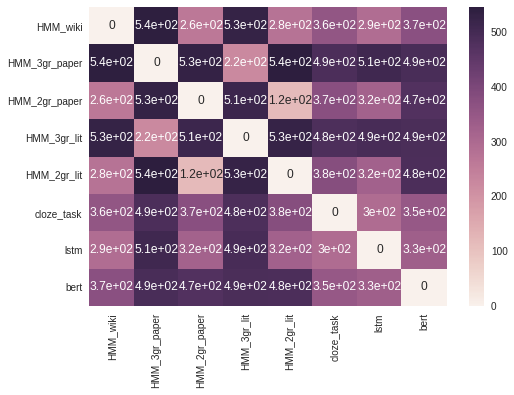

In [0]:
import seaborn as sns; sns.set()
import math
labels = ['HMM_wiki', 'HMM_3gr_paper', 'HMM_2gr_paper', 'HMM_3gr_lit', 'HMM_2gr_lit', 'сloze_task', 'lstm', 'bert']
sns.heatmap(for_hm, xticklabels = labels, yticklabels = labels, annot=True)

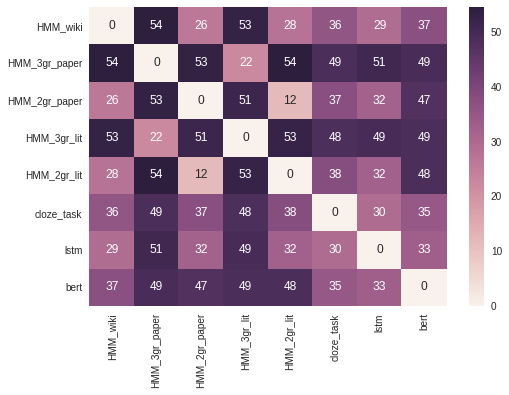

In [0]:
log_for_hm = [[j/10 for j in i] for i in for_hm]
labels = ['HMM_wiki', 'HMM_3gr_paper', 'HMM_2gr_paper', 'HMM_3gr_lit', 'HMM_2gr_lit', 'сloze_task', 'lstm', 'bert']
sns.heatmap(log_for_hm, xticklabels = labels, yticklabels = labels, annot=True)

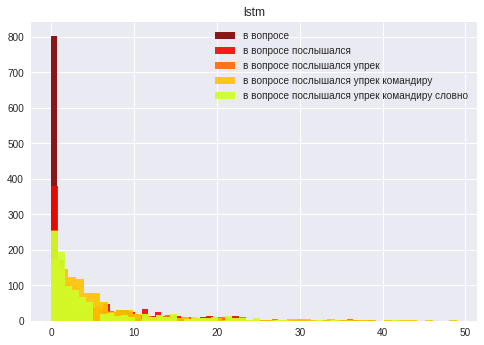

In [0]:
from matplotlib import pylab


def plot_sm(lstm, x):
  lstm.sort(key= lambda k : k['prev'])
  for indx, cont in enumerate(lstm[39:44]):
    indx = 1 - indx/10
    words = [i[0] for i in cont['pred'][:50]]
    probs_ = [i[1] for i in cont['pred'][:50]]
    probs_.sort(reverse=True)
    res = [i/sum(probs_) for i in probs_]
    res[-1] = res[-1]- abs(1.0 - sum(res))
    g = np.random.choice(len(words), 1000, p=res)
    plt.hist(g, bins=50, alpha=0.9, label=str(cont['prev']), color = pylab.cm.jet(indx))
  plt.legend(loc='upper right')
  plt.title(x)
  plt.show()

plot_sm(lstm, 'lstm')

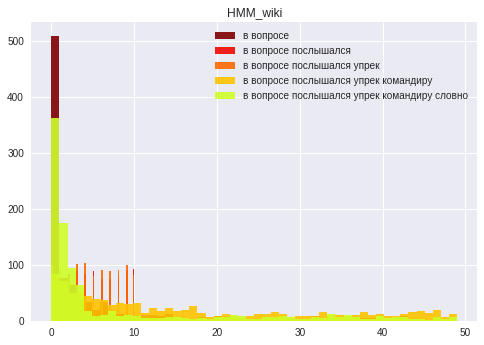

In [0]:
plot_sm(HHM_wiki, 'HMM_wiki')

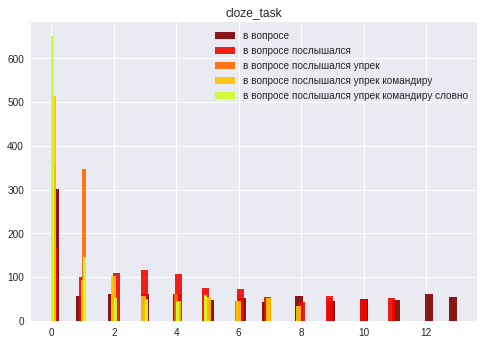

In [0]:
plot_sm(cloze_task, 'сloze_task')

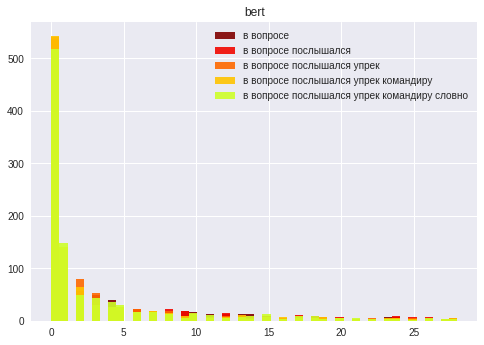

In [0]:
plot_sm(bert, 'bert')

### LSTM PoS-tagging

In [0]:
!pip install pymorphy2

Используем pymorphy для частеречной разметки

In [0]:
import pymorphy2
from collections import Counter
morph = pymorphy2.MorphAnalyzer()

def pos_tagging(data, first_n_words):
  
  data_pos = [(i['prev'], i['orig'][0], [morph.parse(word)[0].tag.POS if morph.parse(word)[0].tag.POS!=None else 'X' for word, prob in i['pred'][:first_n_words]] ) for i in data]
  list_pos_probs = [{pos: (cnt/sum(list(Counter(answers).values()))) for pos, cnt in Counter(answers).items()} for context, cor_word, answers in data_pos]
  list_pos_probs_new = [{ key:0 for key in diction.keys()} for diction in list_pos_probs]
  
  for indx, (context, word, answers_pos) in enumerate(data_pos):
    for indx_pos, pos_tag in enumerate(answers_pos):
      word_prob = data[indx]['pred'][indx_pos][1]
      list_pos_probs_new[indx][pos_tag]+=word_prob
  
  for indx, di in enumerate(list_pos_probs_new):
    recalculated_probs = []
    for word, prob in di.items():
      recalculated_probs.append([word, prob/sum(list(di.values()))])
    recalculated_probs.sort(key=lambda x: x[1], reverse = True)
    list_pos_probs_new[indx] = recalculated_probs 
    
  return [{'prev': i['prev'], 'orig' : [i['orig'][0], 'X'], 'pred': list_pos_probs_new[indx]} for indx, i in enumerate(data)]

  

In [0]:
lstm_pos =  pos_tagging(lstm, 50)
ct_pos =  pos_tagging(cloze_task, 50) 
hmm_wiki_pos =  pos_tagging(HHM_wiki, 50)
hmm_3gr_paper_pos =  pos_tagging(HHM_3gr_paper, 50)
hmm_2gr_paper_pos =  pos_tagging(HHM_2gr_paper, 50)
hmm_3gr_lit_pos =  pos_tagging(HHM_3gr_lit, 50)
hmm_2gr_lit_pos =  pos_tagging(HHM_2gr_lit, 50)
bert_pos =  pos_tagging(bert, 50)

In [0]:
res_ct_pos = th_exp_json(ct_pos)
res_lstm_pos = th_exp_json(lstm_pos)
res_hmm_wiki_pos = th_exp_json(hmm_wiki_pos)
res_hmm_3gr_paper_pos = th_exp_json(hmm_3gr_paper_pos)
res_hmm_2gr_paper_pos = th_exp_json(hmm_2gr_paper_pos)
res_hmm_3gr_lit_pos = th_exp_json(hmm_3gr_lit_pos)
res_hmm_2gr_lit_pos = th_exp_json(hmm_2gr_lit_pos)
res_bert_pos = th_exp_json(bert_pos)

In [0]:
models = [res_hmm_wiki_pos, res_hmm_3gr_paper_pos, res_hmm_2gr_paper_pos, res_hmm_3gr_lit_pos, res_hmm_2gr_lit_pos, res_ct_pos, res_lstm_pos, res_bert_pos]
for_hm_POS = []
for model in models:
  line = []
  for mod in models:
    line.append(k_s_tests(model, mod))
  for_hm_POS.append(line)

In 100.0 % of cases we can say that these distributions are simular
In 8.203445447087777 % of cases we can say that these distributions are simular
In 12.551271534044298 % of cases we can say that these distributions are simular
In 5.906480721903199 % of cases we can say that these distributions are simular
In 9.762100082034454 % of cases we can say that these distributions are simular
In 7.952622673434856 % of cases we can say that these distributions are simular
In 8.613617719442166 % of cases we can say that these distributions are simular
In 9.762100082034454 % of cases we can say that these distributions are simular
In 8.203445447087777 % of cases we can say that these distributions are simular
In 100.0 % of cases we can say that these distributions are simular
In 9.598031173092698 % of cases we can say that these distributions are simular
In 42.24774405250205 % of cases we can say that these distributions are simular
In 5.660377358490567 % of cases we can say that these distribut

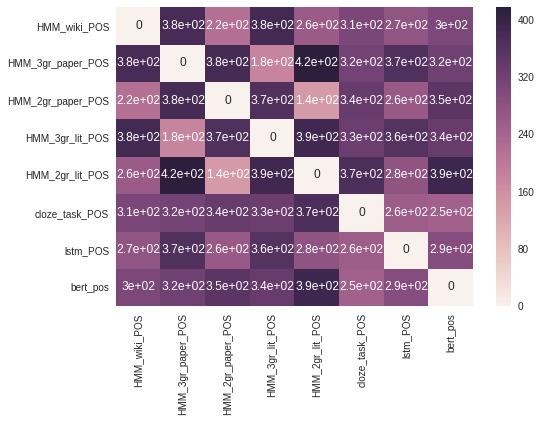

In [0]:
import seaborn as sns; sns.set()
import math
labels = ['HMM_wiki_POS', 'HMM_3gr_paper_POS', 'HMM_2gr_paper_POS', 'HMM_3gr_lit_POS', 'HMM_2gr_lit_POS', 'сloze_task_POS', 'lstm_POS', 'bert_pos']
sns.heatmap(for_hm_POS, xticklabels = labels, yticklabels = labels, annot=True)

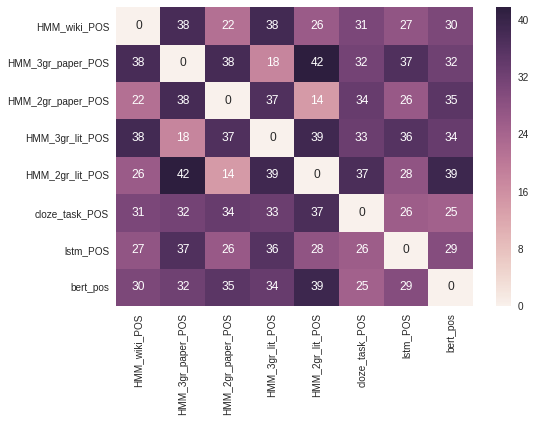

In [0]:
log_for_hm_POS = [[j/10 for j in i] for i in for_hm_POS]
labels = ['HMM_wiki_POS', 'HMM_3gr_paper_POS', 'HMM_2gr_paper_POS', 'HMM_3gr_lit_POS', 'HMM_2gr_lit_POS', 'сloze_task_POS', 'lstm_POS', 'bert_pos']
sns.heatmap(log_for_hm_POS, xticklabels = labels, yticklabels = labels, annot=True)

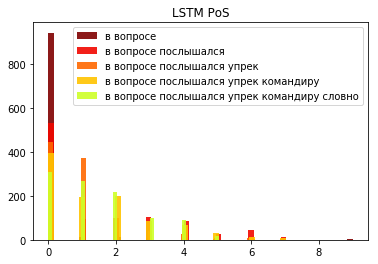

In [0]:
plot_sm(lstm_pos, 'LSTM PoS')

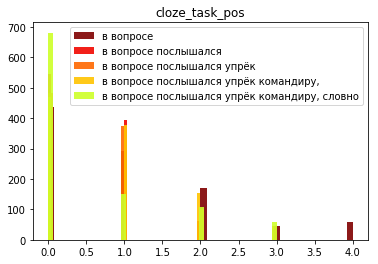

In [0]:
plot_sm(ct_pos, 'cloze_task_pos')

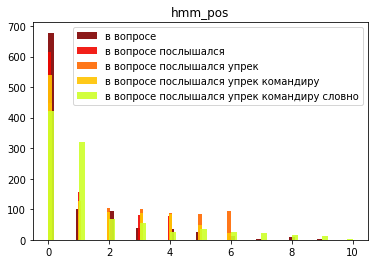

In [0]:
plot_sm(hmm_pos, 'hmm_pos')


In [0]:
# [ ]
X = 'lstm_pos.json'
with open(X,'w',encoding='utf8') as fd:
    JSON_CLOZE = json.dump(lstm_pos,fd)
    
from google.colab import files
files.download(X)

In [0]:
with open('close_pos.json','r',encoding='utf8') as fd:
    JSON_pos_close = json.load(fd)

In [0]:
!ls

adc.json		    hmm_2gr_paper_pos.json  model.py
close_pos.json		    hmm_3gr_lit_pos.json    out-balanced
cloze_task_raw_data.xlsx    hmm_3gr_paper_pos.json  __pycache__
cloze_task_raw_data.xlsx.1  HMM.json		    README.md
data			    hmm_wiki_pos.json	    requirements.txt
data.py			    lstm.json		    ru-jungle
examples		    lstm_pos.json	    ruscorpora.tar.gz
generate.py		    main.py		    sample_data
hmm_2gr_lit_pos.json	    model.pt		    zh-hans.json


In [0]:
JSON_pos_close

[{'orig': ['промывать', 'X'],
  'pred': [['NPRO', 0.3333333333333333],
   ['CONJ', 0.26666666666666666],
   ['ADVB', 0.13333333333333333],
   ['NOUN', 0.13333333333333333],
   ['PRCL', 0.06666666666666667],
   ['ADJF', 0.06666666666666667]],
  'prev': 'а'},
 {'orig': ['манную', 'X'],
  'pred': [['NOUN', 0.9333333333333333], ['PRCL', 0.06666666666666667]],
  'prev': 'а промывать'},
 {'orig': ['крупу', 'X'],
  'pred': [['NOUN', 1.0]],
  'prev': 'а промывать манную'},
 {'orig': ['перед', 'X'],
  'pred': [['PRCL', 0.4666666666666667],
   ['COMP', 0.13333333333333333],
   ['PRED', 0.13333333333333333],
   ['INTJ', 0.06666666666666667],
   ['ADVB', 0.06666666666666667],
   ['PREP', 0.06666666666666667],
   ['VERB', 0.06666666666666667]],
  'prev': 'а промывать манную крупу'},
 {'orig': ['тем', 'X'],
  'pred': [['NOUN', 1.0]],
  'prev': 'а промывать манную крупу перед'},
 {'orig': ['как', 'X'],
  'pred': [['CONJ', 1.0]],
  'prev': 'а промывать манную крупу перед тем‚'},
 {'orig': ['варить', '

In [0]:
from google.colab import files
files.download('res_close_pos.json') 

### Семантическая разметка и сравнение

## Language models Recurrent LSTM

In [0]:
!git clone https://github.com/pytorch/examples

fatal: destination path 'examples' already exists and is not an empty directory.


In [0]:
!cp -r examples/word_language_model/* .

In [0]:
#download texts
!git clone https://github.com/lopuhin/ru-jungle

fatal: destination path 'ru-jungle' already exists and is not an empty directory.


In [0]:
!cp ru-jungle/* .

In [0]:
!ls ru-jungle

LICENSE  main.py  README.rst  requirements.txt	tokenize_with_sp.py


In [0]:
!rm 

adc.json		  HMM.json   out-balanced      ruscorpora.tar.gz
cloze_task_raw_data.xlsx  LICENSE    __pycache__       sample_data
data			  lstm.json  README.md	       tokenize_with_sp.py
data.py			  main.py    README.rst
examples		  model.pt   requirements.txt
generate.py		  model.py   ru-jungle


In [0]:
!ls examples/word_language_model

data  data.py  generate.py  main.py  model.py  README.md  requirements.txt


In [0]:
!rm LICENSE  main.py  README.rst  requirements.txt	tokenize_with_sp.py

In [0]:
!pip install lxml==4.3.1 sentencepiece==0.1.8 tqdm==4.31.1

    100% |████████████████████████████████| 5.7MB 4.8MB/s 
    100% |████████████████████████████████| 1.0MB 21.4MB/s 
    100% |████████████████████████████████| 51kB 19.3MB/s 
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
fastai 1.0.51 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [0]:
#https://drive.google.com/open?id=1Eo1AWhQ9I5uda_Cevr1p_5HJubFZyHqs
idd = '1Eo1AWhQ9I5uda_Cevr1p_5HJubFZyHqs'
downloaded = drive.CreateFile({'id':idd}) 
downloaded.GetContentFile('ruscorpora.tar.gz')  

In [0]:
%%time 
!python3 ./main.py ./ ./out-balanced/

Subtitles.tar.gz not found, skipping
news.zip not found, skipping

Reading ruscorpora.tar.gz (rnc-main)
 71% 746437/1048487 [01:42<3:11:49, 26.24it/s]Failed to parse ruscorpora/main/source/texts/post1950/fiction_mem/abramov/alka.xml: Namespace prefix l for href on a is not defined, line 286, column 92 (ruscorpora.tar.gz, line 286)
100% 1048487/1048487 [06:12<00:00, 2812.59it/s]

110720 texts, 110720 groups in all:
chars: mean: 16138.6 | min: 1 | 1%: 176 | 5%: 326 | median: 2521.0 | 95%: 40264 | 99%: 361962 | max: 2147603 | sum: 1,786,870,477
words: mean: 2414.6 | min: 0 | 1%: 23 | 5%: 44 | median: 348.0 | 95%: 5943 | 99%: 55315 | max: 326881 | sum: 267,344,192
lines: mean: 81.8 | min: 2 | 1%: 3 | 5%: 4 | median: 14.0 | 95%: 184 | 99%: 1835 | max: 18724 | sum: 9,055,244

109972 texts, 109972 groups in train:
chars: mean: 16120.4 | min: 1 | 1%: 175 | 5%: 326 | median: 2521.0 | 95%: 40223 | 99%: 360674 | max: 2147603 | sum: 1,772,787,560
words: mean: 2411.6 | min: 0 | 1%: 23 | 5%: 44 | me

In [0]:
!ls out-balanced/rnc-paper

test.txt  train.txt  valid.txt


In [0]:
!wc -l out-balanced/rnc-paper/valid.txt out-balanced/rnc-paper/train.txt out-balanced/rnc-paper/test.txt 

    2703 out-balanced/rnc-paper/valid.txt
       0 out-balanced/rnc-paper/train.txt
    2784 out-balanced/rnc-paper/test.txt
    5487 total


In [0]:
#creat directory for short corpus
!mkdir out-balanced/rnc-paper_sh

In [0]:
!head -n 2703 out-balanced/rnc-paper/valid.txt > out-balanced/rnc-paper_sh/valid.txt 
!head -n 2784 out-balanced/rnc-paper/test.txt > out-balanced/rnc-paper_sh/test.txt 
!head -n 100000 out-balanced/rnc-paper/train.txt > out-balanced/rnc-paper_sh/train.txt 

In [0]:
!wc -l out-balanced/rnc-paper_sh/valid.txt out-balanced/rnc-paper_sh/train.txt out-balanced/rnc-paper_sh/test.txt 

     2703 out-balanced/rnc-paper_sh/valid.txt
   100000 out-balanced/rnc-paper_sh/train.txt
     2784 out-balanced/rnc-paper_sh/test.txt
   105487 total


In [0]:
#train
!python3 main.py --data out-balanced/rnc-paper_sh --cuda --tied 

Traceback (most recent call last):
  File "main.py", line 62, in <module>
    corpus = data.Corpus(args.data)
  File "/content/data.py", line 23, in __init__
    self.train = self.tokenize(os.path.join(path, 'train.txt'))
  File "/content/data.py", line 46, in tokenize
    ids[token] = self.dictionary.word2idx[word]
KeyboardInterrupt


KeyboardInterrupt: ignored

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
model_file = drive.CreateFile({'title' : 'model.pt'})
model_file.SetContentFile('model.pt')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1BCXpFjjidDziZFU2liXHVELRl1u2Pt7E'})

In [0]:
idd = '1BCXpFjjidDziZFU2liXHVELRl1u2Pt7E'
downloaded_ = drive.CreateFile({'id':idd}) 
downloaded_.GetContentFile('model_lstm_rus_cor_100lines.pt')  

In [0]:
import os
from io import open
import torch

class Dictionary(object):
    def __init__(self):
        self.word2idx = {}
        self.idx2word = []

    def add_word(self, word):
        if word not in self.word2idx:
            self.idx2word.append(word)
            self.word2idx[word] = len(self.idx2word) - 1
        return self.word2idx[word]

    def __len__(self):
        return len(self.idx2word)


class Corpus(object):
    def __init__(self, path):
        self.dictionary = Dictionary()
        self.train = self.tokenize(os.path.join(path, 'train.txt'))
        self.valid = self.tokenize(os.path.join(path, 'valid.txt'))
        self.test = self.tokenize(os.path.join(path, 'test.txt'))

    def tokenize(self, path):
        """Tokenizes a text file."""
        assert os.path.exists(path)
        # Add words to the dictionary
        with open(path, 'r', encoding="utf8") as f:
            tokens = 0
            for line in f:
                words = line.split() + ['<eos>']
                tokens += len(words)
                for word in words:
                    self.dictionary.add_word(word)

        # Tokenize file content
        with open(path, 'r', encoding="utf8") as f:
            ids = torch.LongTensor(tokens)
            token = 0
            for line in f:
                words = line.split() + ['<eos>']
                for word in words:
                    ids[token] = self.dictionary.word2idx[word]
                    token += 1

        return ids

In [0]:
#corpus statistics
DATA_PATH = "./out-balanced/rnc-main_sh"
corpus = Corpus(DATA_PATH)

print("Number of tokens:")
print("Train: ", len(corpus.train))
print("Valid: ", len(corpus.valid))
print("Test:  ", len(corpus.test))

print("Vocabulary size:", len(corpus.dictionary.idx2word))

AssertionError: ignored

In [0]:
DEVICE = torch.device("cpu")
# model = model.RNNModel(
#     "LSTM", len(corpus.dictionary), 650,
#     650, 2, 0.5, True
# ).to(DEVICE)

In [0]:
with open("model_lstm_rus_cor_100lines.pt", 'rb') as f:
    model = torch.load(f, map_location='cpu')
model = model.to(DEVICE)

In [0]:
%%time
BPTT = 50
CRITERION = torch.nn.CrossEntropyLoss()

def batchify(data, bsz):
    # Work out how cleanly we can divide the dataset into bsz parts.
    nbatch = data.size(0) // bsz
    # Trim off any extra elements that wouldn't cleanly fit (remainders).
    data = data.narrow(0, 0, nbatch * bsz)
    # Evenly divide the data across the bsz batches.
    data = data.view(bsz, -1).t().contiguous()
    return data.to(DEVICE)

def get_batch(source, i):
    seq_len = min(BPTT, len(source) - 1 - i)
    data = source[i:i+seq_len]
    target = source[i+1:i+1+seq_len].view(-1)
    return data, target

def evaluate(data_source):
    # Turn on evaluation mode which disables dropout.
    model.eval()
    total_loss = 0.
    ntokens = len(corpus.dictionary)
    hidden = model.init_hidden(10)
    with torch.no_grad():
        for i in range(0, data_source.size(0) - 1, BPTT):
            data, targets = get_batch(data_source, i)
            output, hidden = model(data, hidden)
            output_flat = output.view(-1, ntokens)
            total_loss += len(data) * CRITERION(output_flat, targets).item()
            hidden = repackage_hidden(hidden)
    return total_loss / len(data_source)

def repackage_hidden(h):
    """Wraps hidden states in new Tensors, to detach them from their history."""
    if isinstance(h, torch.Tensor):
        return h.detach()
    else:
        return tuple(repackage_hidden(v) for v in h)
    
test_data = batchify(corpus.test, 10)
loss = evaluate(test_data)

NameError: ignored

In [0]:
loss, np.exp(loss)

(4.606179022249171, 100.1009345307548)

In [0]:
test_tokens = corpus.test.numpy()
eos_pos = np.where(test_tokens == corpus.dictionary.word2idx["<eos>"])[0]
print("Number of lines in test:", len(eos_pos))

Number of lines in test: 4358


In [0]:
# A random line from test dataset
print(" ".join([corpus.dictionary.idx2word[c] for c in test_tokens[eos_pos[100]+1:eos_pos[101]]]))

In the 20th century , he was the favourite poet of Kenneth <unk> , who has described him as " the greatest non @-@ epic , non @-@ dramatic poet who has survived in any language " , and commented that , " he has made me a better man , as a moral agent and as a <unk> organism " .


In [0]:
probabilities = []
def eval_chunk(start, end):
    global probabilities
    token_tensor = corpus.valid[eos_pos[start]+1:eos_pos[end]]
    hidden = model.init_hidden(1)
    with torch.no_grad():
        targets = token_tensor[1:]
        output, hidden = model(token_tensor.unsqueeze(1), hidden)
        print()
        output_flat = output.squeeze(1)
        loss = CRITERION(output_flat[:-1], targets).item()
        sm = torch.nn.Softmax()
        probabilities = sm(output) 
        print(probabilities[:10].size)
        
    sorted_idx = np.argsort(output_flat.numpy(), 1)
    preds = []
    for i in range(1, 4):
        preds.append(list(map(lambda x: corpus.dictionary.idx2word[x], sorted_idx[:, -i])))
    # preds = list(map(lambda x: itos[x], np.argmax(logits.data.cpu().numpy(), 1)))
    return (
        loss,
        pd.DataFrame({
            "orig": [corpus.dictionary.idx2word[x] for x in token_tensor.numpy()] + [" "], 
            "pred_1": [""] + preds[0]
        })
    )

In [0]:
k = [i/ sum(probabilities[0][0][:10]) for i in (probabilities[0][0]).sort()[:10]]
k

NameError: ignored

In [0]:
loss, df = eval_chunk(100,101)
print("Loss:", np.exp(loss))
df.iloc[-50:]


<built-in method size of Tensor object at 0x7fc4cdf94ab0>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Loss: 27.49083804104367


,orig,pred_1
13,first,first
14,usage,two
15,of,of
16,M,the
17,@-@,@-@
18,82,114
19,was,was
20,in,the
21,the,the
22,Upper,same


In [0]:
!